In [1]:
from lib.error_mit_sim import *
import warnings
from qiskit import  Aer, transpile
from qiskit.providers.fake_provider import *
# List of basis gates




def circuit_transpiled(n, backend):
    """
    Transpile a quantum circuit for a specific backend.

    Parameters:
    - n (int): The number of qubits in the circuit.
    - backend (Backend): The backend for which to transpile the circuit.

    Returns:
    - printed (None): Printed information about basis gates and circuit depth.
    - a_tran (Matplotlib object): The drawing of the transpiled circuit.
    """
    
    
    a = TwoLocal(n, rotation_blocks=['ry'], entanglement_blocks=['cx'], entanglement='linear', reps=3, insert_barriers=True)
    
    # Transpile the circuit into the basis gates
    config = backend.configuration()
    basis_gates = config.basis_gates
    transpiled_circ = transpile(a, backend=backend)
    
    printed = print('Basis Gates:', basis_gates, '\n', 'Original depth:', a.depth(), 'Decomposed Depth:', transpiled_circ.depth())
    a_tran = transpiled_circ.draw(output='mpl')
    
    return a_tran, printed
    
    


Basis Gates: ['u1', 'u2', 'u3', 'cx', 'id'] 
 Original depth: 1 Decomposed Depth: 19


/Users/ethanelliotrajkumar/anaconda3/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


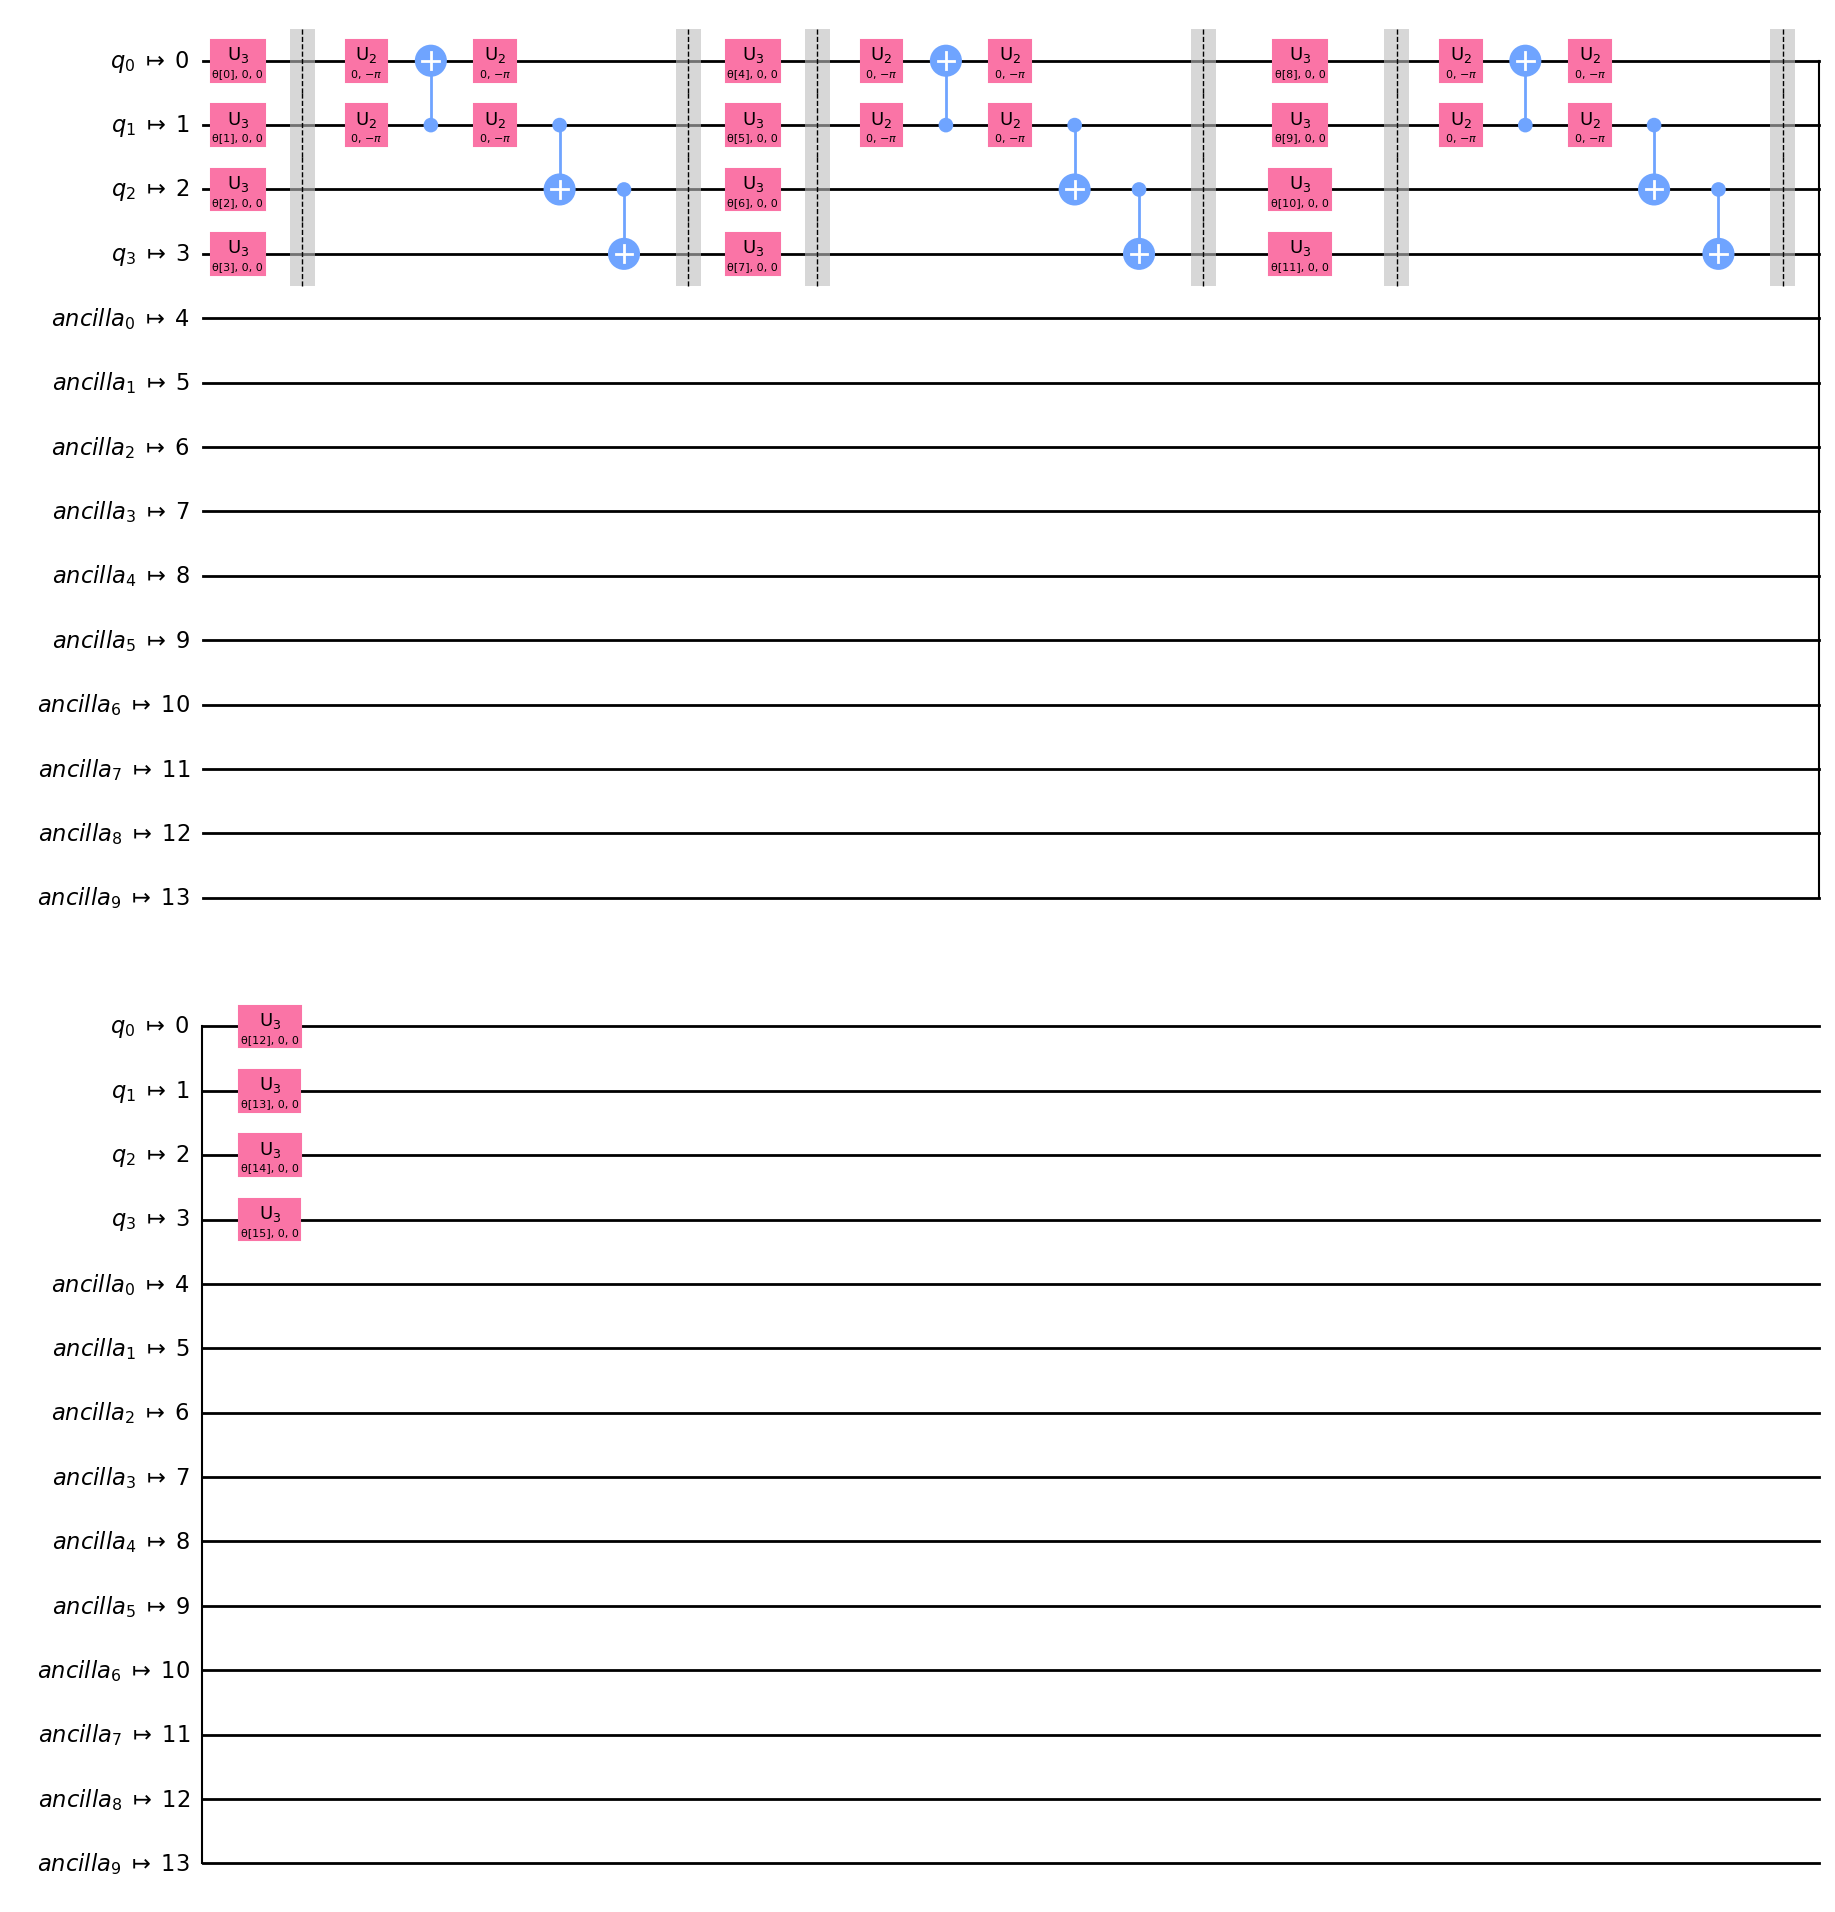

In [2]:
# Transpile the circuit into the basis gates
n = 4
b1= FakeMelbourne()
c1, p1 = circuit_transpiled(n,b1)
c1

Basis Gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset'] 
 Original depth: 1 Decomposed Depth: 25


/Users/ethanelliotrajkumar/anaconda3/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


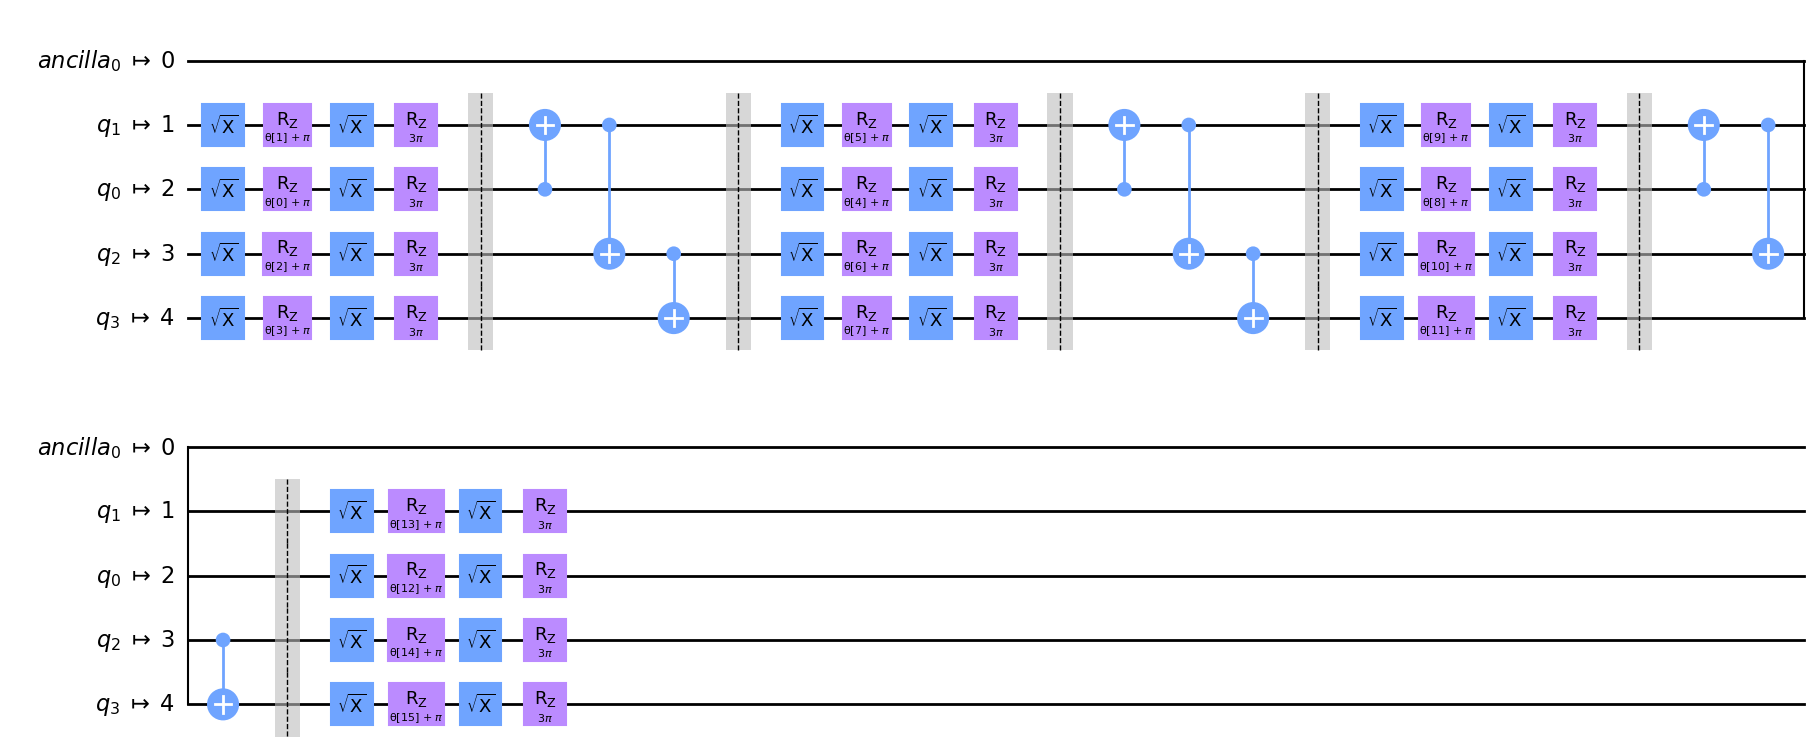

In [3]:
# Transpile the circuit into the basis gates
n = 4
b2= FakeLima()
c2, p2 = circuit_transpiled(n,b2)
c2

Basis Gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset'] 
 Original depth: 1 Decomposed Depth: 25


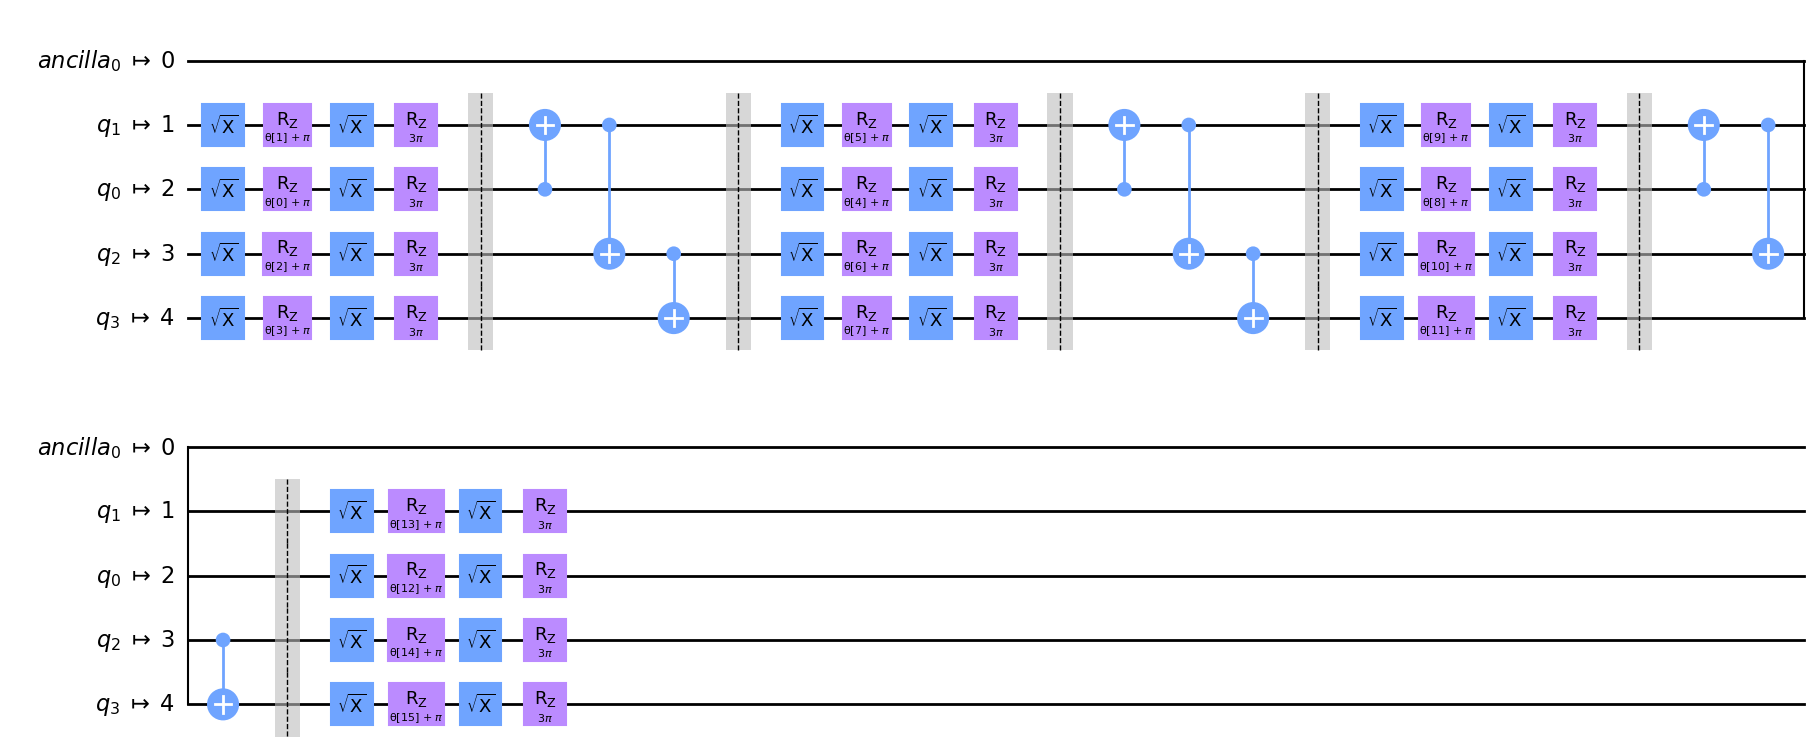

In [4]:
# Transpile the circuit into the basis gates
n = 4
b2= FakeLima()
c2, p2 = circuit_transpiled(n,b2)
c2

In [5]:
import numpy as np
from scipy.linalg import expm

# Define Pauli X matrix
X = np.array([[0, 1], [1, 0]])

# Define Rz rotation matrix function
def Rz(theta):
    return expm(-1j * theta / 2 * np.array([[1, 0], [0, -1]]))

# Define the √X gate as the square root of Pauli X matrix
sqrt_X = expm(-1j * np.pi / 4 * X)

# Define the theta parameter symbolically
theta = np.pi

# Calculate the product of the gates as provided in the original circuit
# Note: In the matrix product, the order of multiplication is reversed because the first gate to be applied is on the right
original_circuit = np.dot(Rz(3*np.pi), np.dot(sqrt_X, np.dot(Rz(theta + np.pi), sqrt_X)))

# Calculate the proposed simplified decomposition
# Here we're assuming the X in the decomposition is actually sqrt_X (as a full X wouldn't be a simplification of the √X gates)
proposed_simplification = np.dot(Rz(3*np.pi), np.dot(X, Rz(theta +  np.pi)))

# Check if the matrices are equal up to a global phase
# We do this by checking if the determinant of the product of one and the inverse of the other is a real number
# (since a global phase would only affect the phase of the determinant, not its magnitude)
are_equal_up_to_global_phase = np.isclose(
    np.linalg.det(np.dot(original_circuit, np.linalg.inv(proposed_simplification))).imag, 0)

original_circuit, proposed_simplification, are_equal_up_to_global_phase


(array([[ 1.2246468e-16-1.99673462e-16j, -1.0000000e+00-1.83697020e-16j],
        [ 1.0000000e+00-1.83697020e-16j,  1.2246468e-16+1.79380389e-16j]]),
 array([[0.000000e+00+0.j, 6.123234e-17-1.j],
        [6.123234e-17+1.j, 0.000000e+00+0.j]]),
 True)

Basis Gates: ['ccx', 'cp', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'delay', 'diagonal', 'ecr', 'h', 'id', 'initialize', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'kraus', 'qerror_loc', 'quantum_channel', 'reset', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_density_matrix', 'set_stabilizer', 'set_statevector'] 
 Original depth: 1 Decomposed Depth: 13


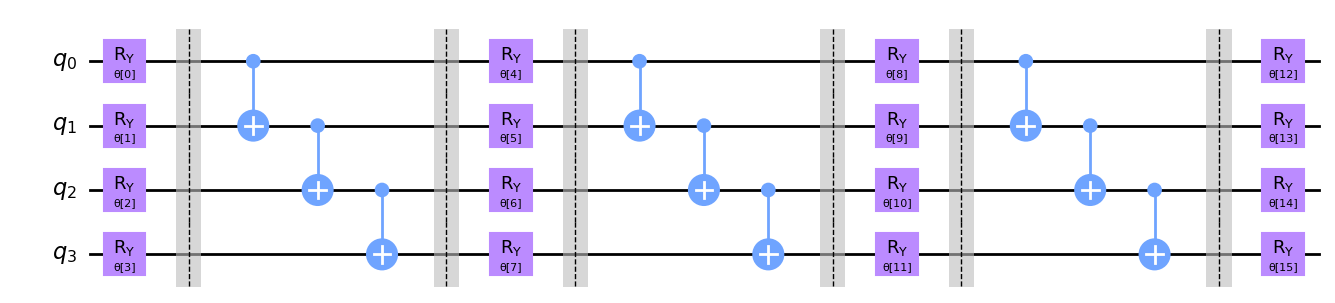

In [6]:
n = 4 
b0 = Aer.get_backend('qasm_simulator')
c0, p0 = circuit_transpiled(n, b0)
c0

In [23]:
# Let's re-import the necessary libraries along with the code for decomposition.
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize

# Define Pauli matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Define the Rz rotation matrix function
def Rz(theta):
    return expm(-1j * theta / 2 * Z)

# Define the Ry rotation matrix function
def Ry(theta):
    return expm(-1j * theta / 2 * Y)

# Define the SX (Sqrt-X) gate
SX_gate = expm(-1j * np.pi / 4 * X)

# Decompose Ry gate into the hardware-efficient basis consisting of Rz and SX gates
def decompose_Ry(theta):
    # Objective function to minimize (fidelity between the target Ry and the decomposed gate sequence)
    def objective(angles):
        phi_1, phi_2 = angles
        decomposed_gate_sequence = np.dot(Rz(phi_1), np.dot(SX_gate, Rz(phi_2)))
        target_gate = Ry(theta)
        # Fidelity calculation
        fidelity = np.abs(np.trace(np.dot(decomposed_gate_sequence, target_gate.conj().T)))
        return 1 - fidelity  # We want to minimize 1 - fidelity
    
    # Initial guess for angles phi_1 and phi_2
    initial_guess = [0, 0]
    
    # Run the optimization to find the angles
    result = minimize(objective, initial_guess, method='Nelder-Mead')
    
    # Extract the optimized angles
    phi_1, phi_2 = result.x
    
    # Construct the decomposed gate sequence with the optimized angles
    decomposed_gate_sequence = np.dot(Rz(phi_1), np.dot(SX_gate, Rz(phi_2)))
    
    return phi_1, phi_2, decomposed_gate_sequence, result.success

# Decompose the Ry gate for a common angle, theta = pi/2 (90 degrees)
theta = np.pi

decomposed_gate_sequence = np.dot(Rz(phi_1), np.dot(SX_gate, Rz(phi_2)))



In [24]:
a = TwoLocal(n, rotation_blocks=['ry'], entanglement_blocks=['cx'], entanglement='linear', reps=3, insert_barriers=True)

In [31]:
a   = transpile(a, basis_gates=['ecr', 'rz', 'x', 'sx', 'id'])
a = transpile(a, optimization_level=3)

/Users/ethanelliotrajkumar/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/ethanelliotrajkumar/anaconda3/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


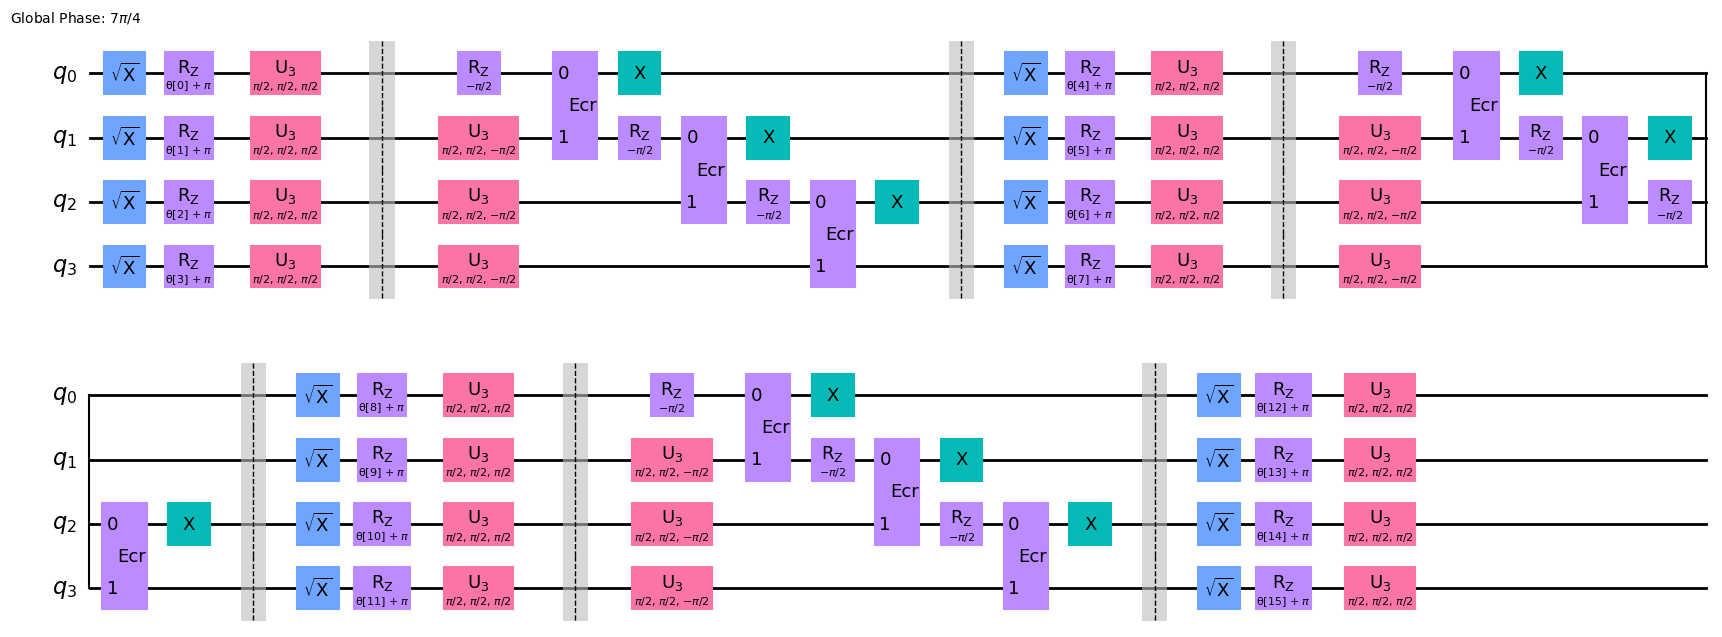

In [32]:
a.draw(output='mpl')